In [1]:
import cv2


def sliding_window(image, step_size, window_size):
    # get the window and image sizes
    h, w = window_size
    image_h, image_w = image.shape[:2]

    # loop over the image, taking steps of size `step_size`
    for y in range(0, image_h, step_size):
        for x in range(0, image_w, step_size):
            # define the window
            window = image[y:y + h, x:x + w]
            # if the window is below the minimum window size, ignore it
            if window.shape[:2] != window_size:
                continue
            # yield the current window
            yield (x, y, window)

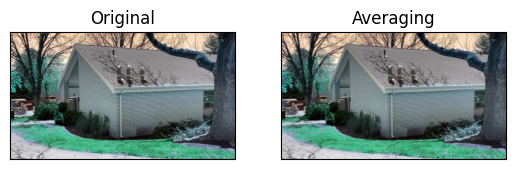

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread("Data/20230501_205454000_iOS/output_0001.jpg")
assert img is not None, "file could not be read, check with os.path.exists()"
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

In [5]:
import numpy as np
import cv2
import math

img = cv2.imread("Data/20230501_205454000_iOS/output_0001.jpg")
img = cv2.resize(img, (0, 0), fx=0.5, fy=0.5)
assert img is not None, "file could not be read, check with os.path.exists()"
gary = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow("gary", gary)
# gary_max = np.max(gary)
# gary_min = np.min(gary)
# # Print the results
# print("Maximum value of gary:", L_max)
# print("Minimum value of gary:", L_min)

size = 5
kernel = np.ones((size,size),np.float32)/size**2
avg = cv2.filter2D(gary,-1,kernel)

# gary_LCE = np.log(gary+1) / np.log(avg+1) * 255
gary_LCE = gary+1 / avg+1
# np.normalize(gary_LCE, gary_LCE, 0, 255, cv2.NORM_MINMAX)
gary_LCE = np.where(gary_LCE > 255, 255, gary_LCE)

# gary_max = np.max(gary_LCE)
# gary_min = np.min(gary_LCE)
# print("Maximum value of gary:", gary_max)
# print("Minimum value of gary:", gary_min)
# gary = (gary - gary_min) / (gary_max - gary_min)
# gary = gary * 255
# gary = gary.astype(np.uint8)
# gary = cv2.equalizeHist(gary)
# gary = cv2.GaussianBlur(gary, (5, 5), 0)
cv2.imshow("gary_LCE", gary_LCE.astype(np.uint8))
cv2.waitKey(0)
cv2.destroyAllWindows()
# plt.subplot(121),plt.imshow(img),plt.title('Original')
# plt.xticks([]), plt.yticks([])
# plt.subplot(122),plt.imshow(gary_LCE),plt.title('Averaging')
# plt.xticks([]), plt.yticks([])
# plt.show()

In [ ]:
import cv2
import numpy as np

# Load the image
img = cv2.imread("Data/20230501_205454000_iOS/output_0001.jpg")
img = cv2.resize(img, (0, 0), fx=0.5, fy=0.5)
# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Define a 5x5 kernel
kernel = np.ones((5, 5), np.uint8)

# Dilate and erode the image to find local maximum and minimum values
dilated = cv2.dilate(gray, kernel)
cv2.imshow("dilated", dilated)
eroded = cv2.erode(gray, kernel)
cv2.imshow("eroded", eroded)

# Compute the local maximum and minimum values
local_max = np.maximum(gray, eroded)
local_min = np.minimum(gray, dilated)

# Display the results
cv2.imshow("Original", gray)
cv2.imshow("Local Maximum", local_max)
cv2.imshow("Local Minimum", local_min)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import numpy as np
import cv2
import math

img = cv2.imread("Data/20230501_205454000_iOS/output_0001.jpg")
img = cv2.resize(img, (0, 0), fx=0.5, fy=0.5)
assert img is not None, "file could not be read, check with os.path.exists()"
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

Lab_image = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
L, a, b = cv2.split(Lab_image)
# Compute the maximum and minimum values of L
# L_max = np.max(L)
# L_min = np.min(L)

# Print the results
print("Maximum value of L:", L_max)
print("Minimum value of L:", L_min)
# cv2.imshow("L channel", L)
size = 5
kernel = np.ones((size,size),np.float32)/size**2
L_dst = cv2.filter2D(L,-1,kernel)
gray_dst = cv2.filter2D(gray,-1,kernel)


# Define a 5x5 kernel
kernel = np.ones((size, size), np.uint8)
# Dilate and erode the image to find local maximum and minimum values
gray_max_dilated = cv2.dilate(gray, kernel)
# cv2.imshow("dilated", dilated)
gray_min_eroded = cv2.erode(gray, kernel)
# cv2.imshow("eroded", eroded)

# Dilate and erode the image to find local maximum and minimum values
# dilated = cv2.dilate(gray, kernel)
# eroded = cv2.erode(gray, kernel)

# Create a binary mask for pixels greater than 1
# mask = cv2.compare(Lab_image, 1, cv2.CMP_GT) & cv2.compare(dst, 1, cv2.CMP_GT)

# Compute LCE using the mask
# LCE = np.zeros_like(L)
# log_LCE = np.log(L/dst)
# LCE = L/dst
# result = np.zeros_like(L)
# result = np.where(L > 1, 0, 255)
# print(result.shape)
# Apply a threshold
# threshold_value = 1
# max_value = 255
# ret, thresholded = cv2.threshold(LCE, threshold_value, max_value, cv2.THRESH_BINARY)

# cv2.imshow('Original', img)
# cv2.imshow('log_LCE', log_LCE)
# cv2.imshow('LCE', LCE)
result = np.where(L > 1, L/L_dst, 0)
cv2.imshow('result', result.astype(np.uint8))
result = np.where(gray > 1, gray/gray_dst, 0)
cv2.imshow('gray_result', result.astype(np.uint8))
# cv2.imshow("Thresholded", thresholded)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import numpy as np

a = np.array([[1, 0, 3], [1, 2, 4]])
b = np.array([1, 2, 4])

result = np.where(a > 1, 255, 0)
print(result) # [0 255 255]

In [ ]:
import numpy as np

a = np.array([[1, 0, 3], [1, 2, 4]])

result = np.where(a > 1, 255, 0)
print(result)

In [ ]:
# Importing the libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Reading the image and converting into B?W
image = cv2.imread("Data/20230501_205454000_iOS/output_0001.jpg")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  
# Applying the function
corners = cv2.goodFeaturesToTrack(
    gray_image, maxCorners=2048, qualityLevel=0.02, minDistance=32)
corners = np.float32(corners)
  
for item in corners:
    x, y = item[0]
    x = int(x)
    y = int(y)
    cv2.circle(image, (x, y), 3, (0, 0, 255), -1)

RGB_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Showing the image
plt.imshow(RGB_img)
plt.axis('off')
plt.show()

# cv2.imshow('good_features', image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [8]:
import numpy as np
import cv2
import math

# img = cv2.imread("/home/jj/Documents/AirSim/2023-06-08-16-28-15/images/img_Drone1_0_0_1686263336838029000.ppm")
img = cv2.imread("Data/20230501_205454000_iOS/output_0001.jpg")
# img = cv2.resize(img, (0, 0), fx=0.5, fy=0.5)
assert img is not None, "file could not be read, check with os.path.exists()"
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

Lab_image = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
L, a, b = cv2.split(Lab_image)


size = 5
kernel = np.ones((size,size),np.float32)/size**2
L_dst = cv2.filter2D(L,-1,kernel)
gray_dst = cv2.filter2D(gray,-1,kernel)


# Define a size x size kernel
kernel = np.ones((size, size), np.uint8)
# Dilate and erode the image to find local maximum and minimum values
gray_max_dilated = cv2.dilate(gray, kernel)
# cv2.imshow("dilated", dilated)
gray_min_eroded = cv2.erode(gray, kernel)
# cv2.imshow("eroded", eroded)

# Dilate and erode the image to find local maximum and minimum values
L_max_dilated = cv2.dilate(L, kernel)
L_min_eroded = cv2.erode(L, kernel)

mask1 = L_dst > 1.0
mask2 = L > 1.0
mask = mask1 & mask2
# Compute LCE using the mask
LCE = np.zeros_like(L)
LCE[mask] = (L[mask]/L_dst[mask])
cv2.imshow('LCE', LCE)

result = np.zeros_like(L)
result = 255 * ((LCE - L_min_eroded) / (L_max_dilated - L_min_eroded))
cv2.imshow('LCE_result', result.astype(np.uint8))

log_LCE = np.zeros_like(L)
log_LCE[mask] = np.log(L[mask]) / np.log(L_dst[mask])
cv2.imshow('log_LCE', log_LCE)

result = np.zeros_like(L)
result = 255 * ((log_LCE - L_min_eroded) / (L_max_dilated - L_min_eroded))
cv2.imshow('log_LCE_result', result.astype(np.uint8))

# result = np.log(L/L_dst)
# result = np.where(L_dst > 1.0, np.log(L/L_dst), 0)
# print(np.min(result), np.max(result))
# result = 255 * ((result - 0) / 255)
# # result = 255 * (result - L_min_eroded) / (L_max_dilated - L_min_eroded)
# cv2.imshow('result', result.astype(np.uint8))
# result = np.where(gray > 1, np.log(gray/gray_dst), 0)
# # result = 255 * (result - gray_min_eroded) / (gray_max_dilated - gray_min_eroded)
# cv2.imshow('gray_result', result.astype(np.uint8))
# # cv2.imshow("Thresholded", thresholded)
cv2.waitKey(0)
cv2.destroyAllWindows()

/tmp/ipykernel_104727/1499146816.py:42: RuntimeWarning: divide by zero encountered in divide
  result = 255 * ((LCE - L_min_eroded) / (L_max_dilated - L_min_eroded))
/tmp/ipykernel_104727/1499146816.py:43: RuntimeWarning: invalid value encountered in cast
  cv2.imshow('LCE_result', result.astype(np.uint8))
/tmp/ipykernel_104727/1499146816.py:50: RuntimeWarning: divide by zero encountered in divide
  result = 255 * ((log_LCE - L_min_eroded) / (L_max_dilated - L_min_eroded))
/tmp/ipykernel_104727/1499146816.py:51: RuntimeWarning: invalid value encountered in cast
  cv2.imshow('log_LCE_result', result.astype(np.uint8))


In [1]:
import cv2
import numpy as np

# Load the image
img = cv2.imread("Data/20230501_205454000_iOS/output_0001.jpg")


# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to the grayscale image
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Compute the unsharp mask
unsharp_mask = gray - blurred

# Add the unsharp mask to the original image
sharpened = gray + unsharp_mask

sharpened = np.where(sharpened > 255, 255, sharpened)
# Display the results
cv2.imshow("Original", gray)
cv2.imshow("Sharpened", sharpened)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt

# img = cv2.imread("/home/jj/Documents/AirSim/2023-06-08-16-28-15/images/img_Drone1_0_0_1686263336838029000.ppm")
img = cv2.imread("Data/20230501_205454000_iOS/output_0001.jpg")
cv2.imshow('img', img)
# img = cv2.resize(img, (0, 0), fx=0.1, fy=0.1)
assert img is not None, "file could not be read, check with os.path.exists()"

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

Lab_image = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
L, a, b = cv2.split(Lab_image)
# print(np.min(L), np.max(L))
size = 5
kernel = np.ones((size,size),np.float32)/size**2
L_dst = cv2.filter2D(L,-1,kernel)
gray_dst = cv2.filter2D(gray,-1,kernel)

# Display the results
# cv2.imshow("L_dst", L_dst)
# cv2.imshow("gray_dst", gray_dst)

mask1 = L_dst > 1
mask2 = L > 1
# mask1 = L_dst ! 0
# mask2 = L ! 0
mask = mask1 & mask2
print(mask.shape, mask.dtype, np.min(mask), np.max(mask))
# # Compute LCE using the mask
# LCE = np.zeros_like(L)
# LCE[mask] = (L[mask]/L_dst[mask])
# print(np.min(LCE), np.max(LCE))

# LCE_norm = (LCE-np.min(LCE))/(np.max(LCE)-np.min(LCE))


# print(np.min(LCE_norm), np.max(LCE_norm))
# LCE_norm = LCE_norm * 255
# cv2.imshow('LCE_norm', LCE_norm.astype(np.uint8))


LCE_log = np.zeros_like(L)
# print("LCE_log", np.min(LCE_log), np.max(LCE_log))
# LCE_log[mask] = np.log(L[mask]) / np.log(L_dst[mask])
# LCE_log[mask] = np.log((L[mask]+1) / (L_dst[mask]+1)) 
# LCE_log[mask] = np.log((L[mask] / L_dst[mask]))

L_div = np.divide(L, L_dst, where=mask1)
LCE_log= np.log(L_div, where =mask)
# LCE_log= np.log((L/L_dst), where = mask)
# print(LCE_log)
print("LCE_log", np.min(LCE_log), np.max(LCE_log))

LCE_log_norm = 255 * (LCE_log-np.min(LCE_log))/(np.max(LCE_log)-np.min(LCE_log))
# print(np.min(LCE_log_norm), np.max(LCE_log_norm))
# LCE_log_norm = LCE_log_norm * 255
print(np.average(LCE_log_norm))
cv2.imshow('LCE_log_norm', LCE_log_norm.astype(np.uint8))


# Define a size x size kernel
kernel = np.ones((size, size), np.uint8)
# Dilate and erode the image to find local maximum and minimum values
L_max_dilated = cv2.dilate(L, kernel)
# print(np.min(L_max_dilated), np.max(L_max_dilated))
# cv2.imshow("dilated", L_max_dilated)

L_min_eroded = cv2.erode(L, kernel)
# print(np.min(L_min_eroded), np.max(L_min_eroded))
# cv2.imshow("eroded", L_min_eroded)


# lmm_LCE_log_norm = 255 * (10**LCE_log - L_min_eroded)/(L_max_dilated - L_min_eroded)
# cv2.imshow('lmm_LCE_log_norm', lmm_LCE_log_norm.astype(np.uint8))



cv2.waitKey(0)
cv2.destroyAllWindows()



# plt.subplot(121),plt.imshow(L_dst),plt.title('L_dst')
# plt.xticks([]), plt.yticks([])
# plt.subplot(122),plt.imshow(gray_dst),plt.title('gray_dst')
# plt.xticks([]), plt.yticks([])
# plt.show()

0 255
(1080, 1920) bool False True
LCE_log -4.182050142641207 1.8827312474337816
174.02952559724284


In [7]:
import cv2
# Merge L, a, b channels into LAB image
Lab = cv2.merge((LCE_log_norm.astype(np.uint8), a, b))
# Convert LAB image to RGB
RGB = cv2.cvtColor(Lab, cv2.COLOR_LAB2BGR)

# Display RGB image
cv2.imshow('LCE_log_norm RGB Image', RGB)


# create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(LCE_log_norm.astype(np.uint8))
# Merge L, a, b channels into LAB image
Lab = cv2.merge((cl1.astype(np.uint8), a, b))
# Convert LAB image to RGB
RGB = cv2.cvtColor(Lab, cv2.COLOR_LAB2BGR)

# Display RGB image
cv2.imshow('CLAHE RGB Image', RGB)


# Perform histogram equalization
equalized_img = cv2.equalizeHist(LCE_log_norm.astype(np.uint8))
Lab = cv2.merge((equalized_img.astype(np.uint8), a, b))

# Convert LAB image to RGB
RGB = cv2.cvtColor(Lab, cv2.COLOR_LAB2BGR)

# Display equalized image
cv2.imshow('Equalized Image', RGB)


cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
import numpy as np
import cv2 as cv
img = cv2.imread("Data/20230501_205454000_iOS/output_0001.jpg")
cv2.imshow('img', img)
assert img is not None, "file could not be read, check with os.path.exists()"

Lab_image = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
L, a, b = cv2.split(Lab_image)

# create a CLAHE object (Arguments are optional).
clahe = cv.createCLAHE(clipLimit=4.0, tileGridSize=(8,8))
cl1 = clahe.apply(L)

# Merge L, a, b channels into LAB image
Lab = cv2.merge((cl1.astype(np.uint8), a, b))
# Convert LAB image to RGB
RGB = cv2.cvtColor(Lab, cv2.COLOR_LAB2BGR)

# Display RGB image
cv2.imshow('RGB Image', RGB)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [1]:
import cv2
import numpy as np

# Load image
img = cv2.imread("Data/20230501_205454000_iOS/output_0001.jpg")
cv2.imshow('img', img)
assert img is not None, "file could not be read, check with os.path.exists()"
Lab_image = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
L, a, b = cv2.split(Lab_image)


# Perform histogram equalization
equalized_img = cv2.equalizeHist(L)
Lab = cv2.merge((equalized_img.astype(np.uint8), a, b))

# Convert LAB image to RGB
RGB = cv2.cvtColor(Lab, cv2.COLOR_LAB2BGR)

# Display equalized image
cv2.imshow('Equalized Image', RGB)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [1]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt


def LCE(img, size=5):
    # Convert image to LAB color space
    Lab_image = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    L, a, b = cv2.split(Lab_image)
    # Avg filter L channel
    kernel = np.ones((size,size),np.float32)/size**2
    L_dst = cv2.filter2D(L,-1,kernel)
    
    mask1 = L_dst > 1
    mask2 = L > 1
    mask = mask1 & mask2
    # Compute LCE using the mask
    LCE_log = np.zeros_like(L)
    L_div = np.divide(L, L_dst, where=mask1)
    LCE_log= np.log(L_div, where =mask)
    LCE_log_norm = 255 * (LCE_log-np.min(LCE_log))/(np.max(LCE_log)-np.min(LCE_log))
    return LCE_log_norm.astype(np.uint8)






img = cv2.imread("Data/20230501_205454000_iOS/output_0001.jpg")
cv2.imshow('img', img)
# img = cv2.resize(img, (0, 0), fx=0.1, fy=0.1)
assert img is not None, "file could not be read, check with os.path.exists()"

Lab_image = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
L, a, b = cv2.split(Lab_image)
size = 5
kernel = np.ones((size,size),np.float32)/size**2
L_dst = cv2.filter2D(L,-1,kernel)

mask1 = L_dst > 1
mask2 = L > 1
mask = mask1 & mask2
print(mask.shape, mask.dtype, np.min(mask), np.max(mask))

# Compute LCE using the mask
LCE_log = np.zeros_like(L)
L_div = np.divide(L, L_dst, where=mask1)
LCE_log= np.log(L_div, where =mask)
LCE_log_norm = 255 * (LCE_log-np.min(LCE_log))/(np.max(LCE_log)-np.min(LCE_log))
cv2.imshow('LCE_log_norm', LCE_log_norm.astype(np.uint8))

# Define a size x size kernel
kernel = np.ones((size, size), np.uint8)
# Dilate and erode the image to find local maximum and minimum values
L_max_dilated = cv2.dilate(L, kernel)
L_min_eroded = cv2.erode(L, kernel)

cv2.waitKey(0)
cv2.destroyAllWindows()

(1080, 1920) bool False True


In [3]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt

def LCE(img, size=5):
    # Convert image to LAB color space
    Lab_image = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    L, a, b = cv2.split(Lab_image)
    # Avg filter L channel
    kernel = np.ones((size,size),np.float32)/size**2
    L_dst = cv2.filter2D(L,-1,kernel)
    
    mask1 = L_dst > 1
    mask2 = L > 1
    mask = mask1 & mask2
    # Compute LCE using the mask
    LCE_log = np.zeros_like(L)
    L_div = np.divide(L, L_dst, where=mask1)
    LCE_log= np.log(L_div, where =mask)
    LCE_log_norm = 255 * (LCE_log-np.min(LCE_log))/(np.max(LCE_log)-np.min(LCE_log))
    return LCE_log_norm.astype(np.uint8), a,b

# img = cv2.imread("Data/Images/img_Drone1_0_0_1686263295327422000.ppm")

img = cv2.imread("Data/img_Drone1_0_0_1684370177247748000.png")
# img = cv2.imread("Data/20230501_205454000_iOS/output_0001.jpg")
cv2.imshow('img', img)
LCE_log_norm, a, b =  LCE(img)
cv2.imshow('LCE', LCE_log_norm)
cv2.imwrite("LCE_log_norm.jpg", LCE_log_norm)
Lab = cv2.merge((LCE_log_norm, a, b))

# Convert LAB image to RGB
BGR = cv2.cvtColor(Lab, cv2.COLOR_LAB2BGR)
cv2.imshow('BGR', BGR)
cv2.imwrite("LCE_log_norm_BGR.jpg", BGR)
# create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(LCE_log_norm.astype(np.uint8))
# Merge L, a, b channels into LAB image
Lab = cv2.merge((cl1.astype(np.uint8), a, b))
# Convert LAB image to RGB
BGR = cv2.cvtColor(Lab, cv2.COLOR_LAB2BGR)

# Display RGB image
cv2.imshow('CLAHE RGB Image', BGR)



cv2.waitKey(0)
cv2.destroyAllWindows()

In [2]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt

def LCE(img, size=5):
    # Convert image to LAB color space
    Lab_image = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    L, a, b = cv2.split(Lab_image)
    # Avg filter L channel
    kernel = np.ones((size,size),np.float32)/size**2
    L_dst = cv2.filter2D(L,-1,kernel)
    
    mask1 = L_dst > 1
    mask2 = L > 1
    mask = mask1 & mask2
    # Compute LCE using the mask
    LCE_log = np.zeros_like(L)
    L_div = np.divide(L, L_dst, where=mask1)
    LCE_log= np.log(L_div, where =mask)
    LCE_log_norm = 255.0 * (LCE_log-np.min(LCE_log))/(np.max(LCE_log)-np.min(LCE_log))
    return LCE_log_norm.astype(np.uint8)

cap = cv2.VideoCapture('Triangle_video_15.mp4')
frame_idx = 0
while True:

    ret, frame = cap.read()    
    if ret:
        frame = cv2.resize(frame, (0, 0), fx=0.5, fy=0.5)
        # img_lce= LCE(frame)
        cv2.imshow('LCE', LCE(frame))
        frame_idx += 1
        # text = "frame count: %d" % frame_idx
        # cv2.putText(img_lce, text, (0,25), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1, cv2.LINE_AA)
        # cv2.imshow('img_lce', img_lce)
        ch = cv2.waitKey(0)
        if ch ==27:
            # cv.imwrite('track.jpg', vis)
            break

    else:
        break

cap.release()
cv2.destroyAllWindows()


/tmp/ipykernel_208864/3835575343.py:21: RuntimeWarning: overflow encountered in multiply
  LCE_log_norm = 255.0 * (LCE_log-np.min(LCE_log))/(np.max(LCE_log)-np.min(LCE_log))
/tmp/ipykernel_208864/3835575343.py:22: RuntimeWarning: invalid value encountered in cast
  return LCE_log_norm.astype(np.uint8)


In [4]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt

def LCE(img, size=5):
    # Convert image to LAB color space
    Lab_image = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    L, a, b = cv2.split(Lab_image)
    # Avg filter L channel
    kernel = np.ones((size,size),np.float32)/size**2
    L_dst = cv2.filter2D(L,-1,kernel)
    
    mask1 = L_dst > 1
    mask2 = L > 1
    mask = mask1 & mask2
    # Compute LCE using the mask
    LCE_log = np.zeros_like(L)
    L_div = np.divide(L, L_dst, where=mask1)
    LCE_log= np.log(L_div, where =mask)
    LCE_log_norm = 255.0 * (LCE_log-np.min(LCE_log))/(np.max(LCE_log)-np.min(LCE_log))
    return LCE_log_norm.astype(np.uint8)

cap = cv2.VideoCapture('output_video_30.mp4')
frame_idx = 0
while True:

    ret, frame = cap.read()    
    if ret:
        frame = cv2.resize(frame, (0, 0), fx=0.5, fy=0.5)
        # img_lce= LCE(frame)
        cv2.imshow('LCE', LCE(frame))
        frame_idx += 1
        # text = "frame count: %d" % frame_idx
        # cv2.putText(img_lce, text, (0,25), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1, cv2.LINE_AA)
        # cv2.imshow('img_lce', img_lce)
        ch = cv2.waitKey(0)
        if ch ==27:
            # cv.imwrite('track.jpg', vis)
            break

    else:
        break

cap.release()
cv2.destroyAllWindows()
